In [1]:
%matplotlib nbagg
%pylab
import seaborn as sns

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


# Cómo leer esto

Si no sabés programar: con leer las partes con texto en español y mirar los dibujos debería alcanzar (asumiendo que fui suficientemente claro, obvio)

Si sos programador: hacé lo que quieras :P

# Metaforas matemáticas

Ayer charlando recordé de lo que podría llamarse una metáfora matemática que me gustó bastante. 
Esta metáfora la aprendí mirando [este](https://www.coursera.org/learn/model-thinking) curso, la parte de tipping points.


# Problema abstracto: cruzando al otro lado

Tenemos una grilla de 10 celdas por 10 celdas como la que se ve en la figura de abajo.

La consigna es encontrar un camino pintado de negro que conecte el borde inferior con el superior.Sólo se está permitido moverse en direcciones arriba / abajo, o izquierda / derecha. 

En el ejemplo de abajo, se puede ver una solución con línea roja punteada

La pregunta es: **Si el color (blanco / negro) de cada celda está elegida al azar, cual es la probabilidad de que podamos llegar de un lado al otro?**

La siguiente pregunta es **Como cambia nuestra respuesta si en lugar de ser 50% negro / 50% blanco, fuera 30% negro / 70% blanco**. 

En general lo que nos interesa saber es cómo depende la probabilidad de poder cruzar, en función de de la probabilidad del color de cada casillero (la misma para todos)

<IPython.core.display.Javascript object>


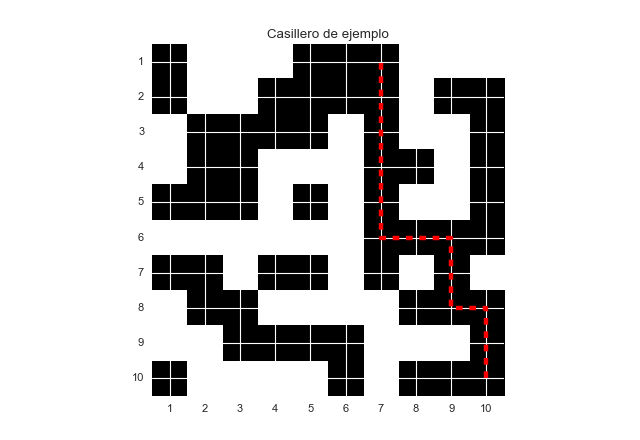

El camino se encuentra marcado con la linea punteada roja


In [2]:
import numpy as np

def sample_grid(size, threshold=0.5, seed=None):
    rnd = np.random.RandomState(seed) if seed else np.random
    return rnd.random_sample((size, size)) < threshold

figure()
title('Casillero de ejemplo')
imshow(sample_grid(10, seed=42), interpolation='nearest')
xticks(range(10), range(1, 11))
yticks(range(10), range(1, 11))
plot([9, 9, 8, 8, 6, 6], [9, 7, 7, 5, 5, 0], 'r--', lw=4)
print "El camino se encuentra marcado con la linea punteada roja"

# Manos a la masa

El primer paso necesariamente es poder responder de forma automática y para una grilla específica, si se puede cruzar o no.
Para eso programe brevemente el algoritmo que calcula si existe el camino. 

El algoritmo es muy visual. Comienza con todos los posibles puntos de partida (o sea, los cuadrados pintados de negro de la fila inferior o superior, es lo mismo). Luego, hace dos pasos: se mueve a la izquierda y la derecha todo lo posible, y luego salta a la próxima fila desde todos los lugares posibles.
Si al final pudimos llegar a algun lado, hay camino.


In [20]:
def exists_path(m):
    """
    Devuelve True si existe un camino de un lado al otro
    """
    current = m[0]
    for row in m[1:]:
        current = current & row    
        expand(current, row, 1)
        expand(current, row, -1)
    return current.any()

def expand(mask, row, direction):
    """
    Helper function, expande la mascara `mask` usando los valores de `row` en la direccion establecida por `direction`
    Los valores para `direction` son +1 o -1
    """
    already_covered = -1 # to avoid go over the same cells again
    n_true = mask.sum() # to stop working once we have a complete mask
    
    for idx in sorted(find(mask), key=lambda x: - direction * x):
        if n_true == len(mask): return
        i = idx
        while i != already_covered and i > 0 and i < len(row) and row[i]:
            mask[i] = True
            n_true += 1
            i += direction
        already_covered = idx


# Midiendo

Con el algoritmo en la mano, ahora podemos ver cómo se comporta.

A priori es claro que si todas las celdas son negras (probabilidad de celda = 100%), siempre se va a poder cruzar.
Por otro lado, si todas las celdas son blancas (probabilidad de celda = 0%) nunca se va a poder cruzar.

El tema es cuando no es ni 0% ni 100%. Es decir, lo que nos interesa responder es:

* **Cómo varía la probabilidad de poder cruzar en función de la probabilidad de la celda?**
* Luego, **cómo afecta el tamaño de la grilla?**

In [22]:
from tqdm import tqdm

def get_experiment_data(grid_size=10, sample_size=100, thresholds=None):
    x = thresholds if thresholds is not None else linspace(0, 1)
    y = []
    for t in tqdm(x):
        y.append(np.sum([exists_path(sample_grid(grid_size, t))  for _ in xrange(sample_size)]))
    return x, y

def experiment(grid_size=10, sample_size=100, thresholds=None):
    x, y = get_experiment_data(grid_size=grid_size, sample_size=100, thresholds=thresholds)
    figure()
    plot(x, y, '-o')
    xlabel('Probabilidad que salga cara')
    ylabel('Cantidad de grillas que tenian un camino')
    title('Resultado experimento para grillas {g}x{g}'.format(g=grid_size))
    
    locs = xticks()[0]
    xticks(locs, ['{}%'.format(int(e*100)) for e in locs])

# Experimento 1: en la grilla de 10 x 10

En la figura de abajo se puede ver la probabilidad de cruzar en función de la probabilidad de la celda, para una grilla de 10x10.

Podemos ver algo notable. Por debajo de 40% de probabilidad de negro, las chances de que haya un camino son nulas.

En la region entre 40% y 80% pasa de ser imposible a ser 100% probable.

100%|██████████| 50/50 [00:01<00:00, 49.01it/s]


<IPython.core.display.Javascript object>


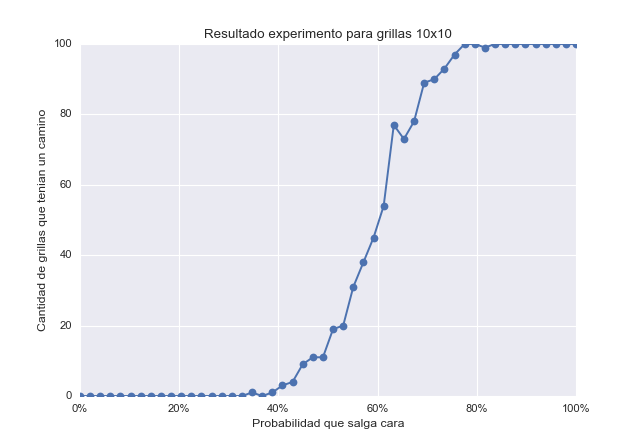

In [12]:
experiment(sample_size=1000)

# Experimento 2: Agrandando la grilla

Qué pasa cuando agrandamos la grilla?

El intervalo de accion se hace más abrupto. Muy interesante!

100%|██████████| 50/50 [00:34<00:00,  1.12s/it]


<IPython.core.display.Javascript object>


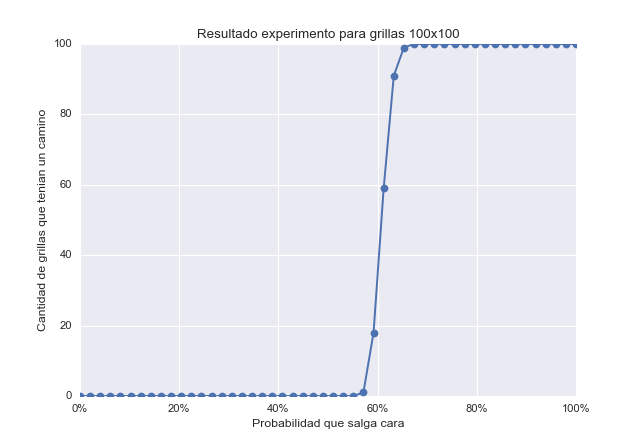

100%|██████████| 50/50 [00:38<00:00,  1.54s/it]


<IPython.core.display.Javascript object>


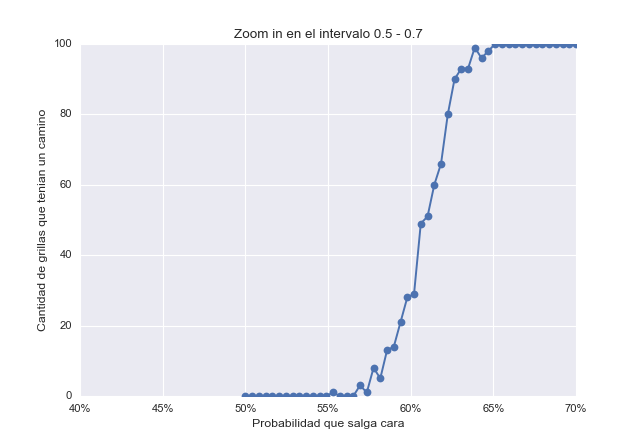

In [23]:
experiment(grid_size=100)
experiment(grid_size=100, thresholds=np.linspace(0.5, 0.7))
title('Zoom in en el intervalo 0.5 - 0.7')

# Metáfora matemática

Es muy interesante este problema como analogía a las innumerables veces en la historia de la humanidad, cuando todavía no globalizada, las mismas ideas emergian de forma independiente. 

Sin desmerecer para nada el esfuerzo individual, una idea que es interesante, es que cuando ocurren este tipo de cosas, lo que estamos viendo es que en realidad como sociedad estabamos en un punto donde tenía sentido que esa idea ocurriera.